In [1]:
from analysis import ANALYSIS_CONFIGS
from analysis.analysis import FinancialAnalysis
from analysis.doc_utils import ReportDocument

In [2]:
ANALYSIS_CONFIGS

['all_analysis.json',
 'asset_quality_analysis.json',
 'asset_indepth_analysis.json',
 'asset_fraud_analysis.json',
 'profit_analysis.json',
 'cash_flow_analysis.json']

In [3]:
analysis = FinancialAnalysis(ANALYSIS_CONFIGS[0])
images, titles, fields = analysis.images, analysis.titles, analysis.fields

### 总资产规模和增长率

In [4]:
t1 = analysis.init_table('t1')
t1['总资产增长率'] = t1['资产合计(元)'].pct_change()

analysis.format_show_table('t1')

,2015,2016,2017,2018,2019,2020
资产合计(元),"5,026,642,400","6,415,202,500","7,926,615,200","9,455,361,500","10,651,922,600","12,457,568,300"
总资产增长率,nan%,27.62%,23.56%,19.29%,12.65%,16.95%


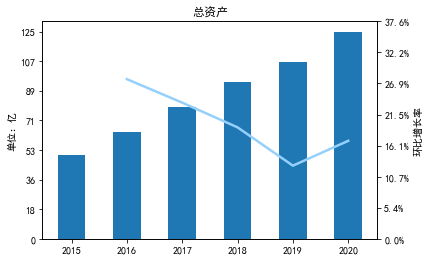

In [5]:
analysis.show_plot('t1')

### 资产负债率

In [6]:
t2 = analysis.init_table('t2')
t2['资产负债率'] = t2['负债合计(元)'] / t2['资产合计(元)']

analysis.format_show_table('t2')

,2015,2016,2017,2018,2019,2020
负债合计(元),"1,860,356,000","2,289,957,600","2,669,143,900","3,324,513,200","3,677,639,200","4,263,789,000"
资产合计(元),"5,026,642,400","6,415,202,500","7,926,615,200","9,455,361,500","10,651,922,600","12,457,568,300"
资产负债率,37.01%,35.70%,33.67%,35.16%,34.53%,34.23%


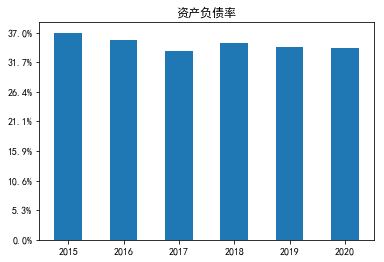

In [7]:
analysis.show_plot('t2')

### 准货币资金与有息负债的差额

In [8]:
t3 = analysis.init_table('t3')
t3['准货币资金'] = t3.T[:4].sum()
t3['有息负债总额'] = t3.T[5:10].sum()
t3['总货币资金与有息负债之差'] = t3['准货币资金'] - t3['有息负债总额']

analysis.format_show_table('t3')

,2015,2016,2017,2018,2019,2020
货币资金(元),"2,323,218,500","3,448,409,300","2,581,883,300","2,196,706,800","4,054,121,700","3,921,052,700"
交易性金融资产(元),0,0,0,0,"1,360,000,000","2,352,000,000"
其他流动资产里的理财产品,0,0,"1,500,000,000","2,570,000,000",0,0
其他流动资产里的结构性存款,0,0,0,0,0,0
准货币资金,"2,323,218,500","3,448,409,300","4,081,883,300","4,766,706,800","5,414,121,700","6,273,052,700"
短期借款(元),0,0,0,0,0,"6,076,200"
一年内到期的非流动负债(元),0,0,0,0,0,0
长期借款(元),0,0,0,0,0,0
应付债券(元),0,0,0,0,0,0
长期应付款,0,0,0,0,0,0


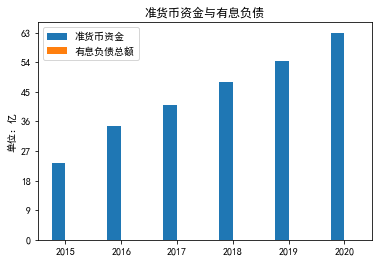

In [9]:
analysis.show_plot('t3')

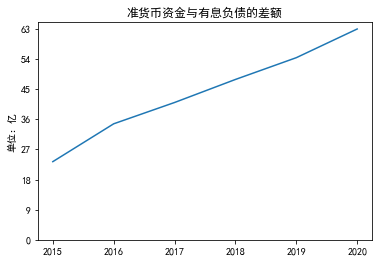

In [10]:
analysis.show_plot('t3', image_index=1)

### 应付预收减应收预付的差额

In [11]:
t4 = analysis.init_table('t4')
t4['应付与预收合计'] = t4.T[:4].sum()
t4['应收与预付合计'] = t4.T[5:10].sum()
t4['应付预收减应收预付的差额'] = t4['应付与预收合计'] - t4['应收与预付合计']

analysis.format_show_table('t4')

,2015,2016,2017,2018,2019,2020
其中：应付票据(元),0,0,"365,613,300","411,415,000","603,308,600","751,802,500"
应付账款(元),"964,246,700","910,854,400","1,045,259,500","1,195,563,100","1,395,061,300","1,723,832,200"
预收款项(元),"524,551,900","840,328,500","735,005,100","1,170,088,500","1,092,261,300",0
合同负债(元),0,0,0,0,0,"949,591,228"
应付与预收合计,"1,488,798,600","1,751,182,900","2,145,877,900","2,777,066,600","3,090,631,200","3,425,225,928"
其中：应收票据(元),"613,732,800","637,529,200","1,007,950,700","1,268,146,300","986,693,100","1,832,701,400"
合同资产(元),0,0,0,0,0,0
应收款项融资,0,0,0,0,"408,972,104",0
应收账款(元),"320,387,700","331,595,200","371,167,700","446,773,100","725,630,900","1,008,235,900"
预付款项(元),"20,355,100","32,828,400","58,386,100","59,485,900","50,113,500","69,889,400"


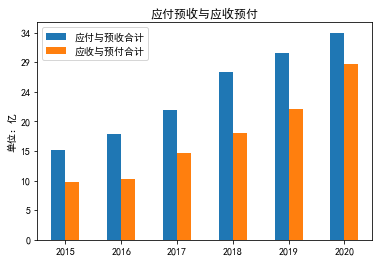

In [12]:
analysis.show_plot('t4')

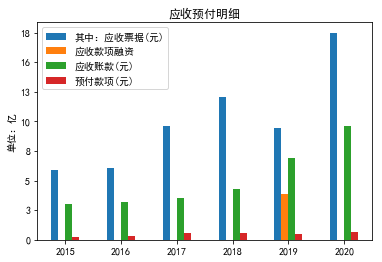

In [13]:
analysis.show_plot('t4', image_index=1)

### 应收账款+合同资产占总资产的比例

In [14]:
t5 = analysis.init_table('t5')
t5['应收账款+合同资产'] = t5.T[:2].sum()
t5['(应收账款+合同资产)占总资产的比率'] = t5['应收账款+合同资产'] / t5['资产合计(元)']

analysis.format_show_table('t5')

,2015,2016,2017,2018,2019,2020
合同资产(元),0,0,0,0,0,0
应收账款(元),"320,387,700","331,595,200","371,167,700","446,773,100","725,630,900","1,008,235,900"
应收账款+合同资产,"320,387,700","331,595,200","371,167,700","446,773,100","725,630,900","1,008,235,900"
资产合计(元),"5,026,642,400","6,415,202,500","7,926,615,200","9,455,361,500","10,651,922,600","12,457,568,300"
(应收账款+合同资产)占总资产的比率,6.37%,5.17%,4.68%,4.73%,6.81%,8.09%


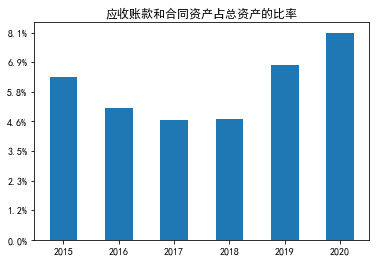

In [15]:
analysis.show_plot('t5')

### 固定资产占总资产的比重

In [16]:
t6 = analysis.init_table('t6')
t6['固定资产+在建工程'] = t6.T[:2].sum()
t6['固定型资产占总资产的比率'] = t6['固定资产+在建工程'] / t6['资产合计(元)']

analysis.format_show_table('t6')

,2015,2016,2017,2018,2019,2020
固定资产合计(元),"871,990,200","852,193,400","828,422,300","842,877,500","826,234,900","824,978,400"
在建工程合计(元),0,0,"21,085,400","184,440,700","272,211,700","463,424,600"
固定资产+在建工程,"871,990,200","852,193,400","849,507,700","1,027,318,200","1,098,446,600","1,288,403,000"
资产合计(元),"5,026,642,400","6,415,202,500","7,926,615,200","9,455,361,500","10,651,922,600","12,457,568,300"
固定型资产占总资产的比率,17.35%,13.28%,10.72%,10.86%,10.31%,10.34%


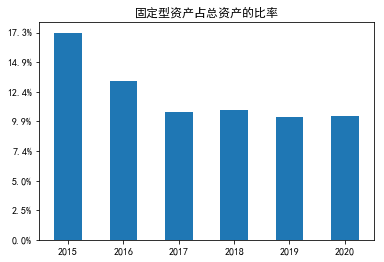

In [17]:
analysis.show_plot('t6')

### 投资类资产占比分析

In [18]:
t7 = analysis.init_table('t7')
t7['投资类资产合计'] = t7.T[:8].sum()
t7['投资类资产占总资产的比率'] = t7['投资类资产合计'] / t7['资产合计(元)']

analysis.format_show_table('t7')

,2015,2016,2017,2018,2019,2020
以公允价值计量且其变动计入当期损益的金融资产(元),0,0,0,0,0,0
债权投资(元),0,0,0,0,0,0
可供出售金融资产(元),"27,734,000","27,734,000","147,734,000","119,948,500",0,0
其他权益工具投资(元),0,0,0,0,"102,116,000","102,116,000"
持有至到期投资(元),0,0,0,0,0,0
其他非流动金融资产(元),0,0,0,0,0,0
长期股权投资(元),0,"817,900","3,815,200","2,617,900","4,168,300","3,452,800"
投资性房地产(元),"148,500","139,500","130,600","121,600","112,600","2,591,000"
投资类资产合计,"27,882,500","28,691,400","151,679,800","122,688,000","106,396,900","108,159,800"
资产合计(元),"5,026,642,400","6,415,202,500","7,926,615,200","9,455,361,500","10,651,922,600","12,457,568,300"


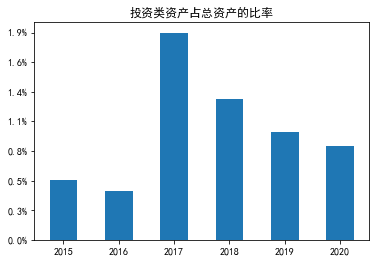

In [19]:
analysis.show_plot('t7')

In [20]:
t8 = analysis.init_table('t8')
t8['存货占总资产的比率'] = t8['存货(元)'] / t8[ '资产合计(元)']

analysis.format_show_table('t8')

,2015,2016,2017,2018,2019,2020
存货(元),"721,573,000","914,493,000","1,112,902,200","1,347,112,700","1,339,176,900","1,386,089,300"
资产合计(元),"5,026,642,400","6,415,202,500","7,926,615,200","9,455,361,500","10,651,922,600","12,457,568,300"
存货占总资产的比率,14.35%,14.26%,14.04%,14.25%,12.57%,11.13%


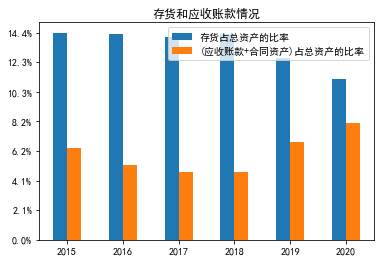

In [21]:
import pandas as pd
from analysis.utils import plot_show

tmp_df = pd.merge(
    t8['存货占总资产的比率'], 
    t5['(应收账款+合同资产)占总资产的比率'],
    right_index=True,
    left_index=True
)
plot_show(tmp_df, image_title=images['t8'][0], y_label='', y_format='', save_image=True)

### 商誉占比

In [22]:
t9 = analysis.init_table('t9')
t9['商誉占总资产的比率'] = t9['商誉(元)'] / t9[ '资产合计(元)']

analysis.format_show_table('t9')

,2015,2016,2017,2018,2019,2020
商誉(元),0,0,0,"80,589,600","80,589,600","80,589,600"
资产合计(元),"5,026,642,400","6,415,202,500","7,926,615,200","9,455,361,500","10,651,922,600","12,457,568,300"
商誉占总资产的比率,0.00%,0.00%,0.00%,0.85%,0.76%,0.65%


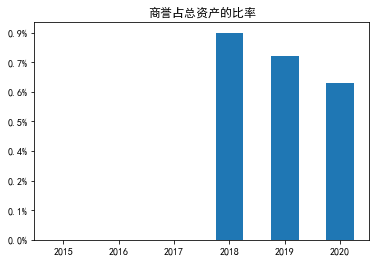

In [23]:
analysis.show_plot('t9')

### 营业收入分析

In [24]:
t10 = analysis.init_table('t10')
t10['营业收入增长率'] = t10['其中：营业收入(元)'].pct_change()

analysis.format_show_table('t10')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
营业收入增长率,nan%,27.56%,21.10%,5.81%,4.52%,4.74%


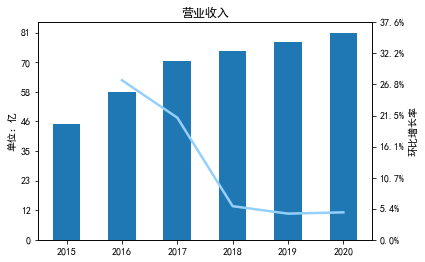

In [25]:
analysis.show_plot('t10')

In [26]:
t11 = analysis.init_table('t11')
t11['毛利率'] = (t11['其中：营业收入(元)']-t11['其中：营业成本(元)']) / t11['其中：营业收入(元)']
t11['毛利率波动率'] = t11['毛利率'].pct_change()

analysis.format_show_table('t11')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
其中：营业成本(元),"1,899,998,300","2,474,046,300","3,250,587,700","3,450,765,200","3,548,777,700","3,563,206,900"
毛利率,58.17%,57.31%,53.68%,53.52%,54.27%,56.16%
毛利率波动率,nan%,-1.49%,-6.33%,-0.29%,1.40%,3.49%


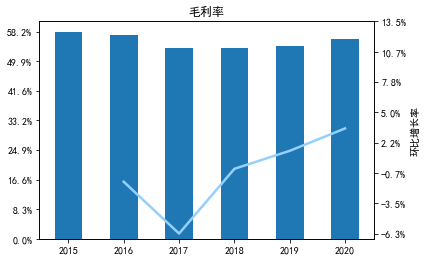

In [27]:
analysis.show_plot('t11')

### 期间费用率

In [28]:
t12 = analysis.init_table('t12')
t12.loc[t12['财务费用(元)']<0, '财务费用(元)'] = 0
t12['四费合计'] = t12.T[:4].sum()
t12['期间费用率'] = t12['四费合计'] / t12['其中：营业收入(元)']
t12['毛利率'] = t11['毛利率']
t12['期间费用率占毛利率的比率'] = t12['期间费用率'] / t12['毛利率']

analysis.format_show_table('t12')

,2015,2016,2017,2018,2019,2020
销售费用(元),"1,353,472,800","1,545,113,300","1,677,876,500","1,909,856,800","1,928,259,200","2,146,965,000"
管理费用(元),"354,268,800","449,159,300","247,834,600","272,355,100","284,364,100","296,985,800"
研发费用(元),0,0,"233,127,000","293,427,200","299,469,100","303,347,600"
财务费用(元),0,0,0,0,0,0
四费合计,"1,707,741,600","1,994,272,600","2,158,838,100","2,475,639,100","2,512,092,400","2,747,298,400"
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
期间费用率,37.59%,34.41%,30.76%,33.34%,32.37%,33.80%
毛利率,58.17%,57.31%,53.68%,53.52%,54.27%,56.16%
期间费用率占毛利率的比率,64.62%,60.05%,57.31%,62.29%,59.64%,60.18%


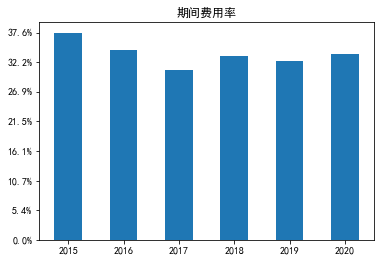

In [29]:
analysis.show_plot('t12')

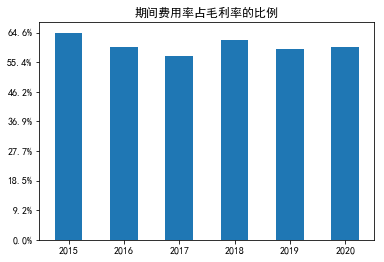

In [30]:
analysis.show_plot('t12', image_index=1)

### 销售费用率

In [31]:
t13 = analysis.init_table('t13')
t13['销售费用率'] = t13['销售费用(元)'] / t13['其中：营业收入(元)']

analysis.format_show_table('t13')

,2015,2016,2017,2018,2019,2020
销售费用(元),"1,353,472,800","1,545,113,300","1,677,876,500","1,909,856,800","1,928,259,200","2,146,965,000"
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
销售费用率,29.79%,26.66%,23.91%,25.72%,24.85%,26.41%


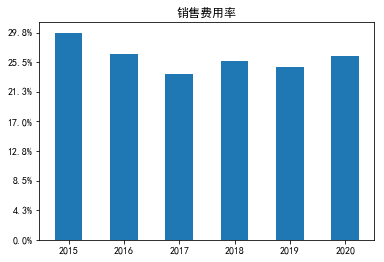

In [32]:
analysis.show_plot('t13')

### 主营利润

In [33]:
t14 = analysis.init_table('t14')
t14['四费合计'] = t12['四费合计']
t14['主营利润'] = t14['其中：营业收入(元)'] - t14.T[1:4].sum()
t14['主营利润率'] = t14['主营利润'] / t14['其中：营业收入(元)']
t14['主营利润占营业利润的比率'] = t14['主营利润'] / t14['三、营业利润(元)']

analysis.format_show_table('t14')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
其中：营业成本(元),"1,899,998,300","2,474,046,300","3,250,587,700","3,450,765,200","3,548,777,700","3,563,206,900"
营业税金及附加(元),"46,546,200","67,524,300","66,643,000","70,571,400","66,618,100","61,956,600"
四费合计,"1,707,741,600","1,994,272,600","2,158,838,100","2,475,639,100","2,512,092,400","2,747,298,400"
主营利润,"888,431,928","1,259,054,667","1,541,328,258","1,427,909,574","1,633,093,656","1,756,158,899"
主营利润率,19.56%,21.73%,21.96%,19.23%,21.04%,21.60%
三、营业利润(元),"953,027,986","1,334,633,128","1,690,032,921","1,701,556,037","1,871,755,798","1,951,474,414"
主营利润占营业利润的比率,93.22%,94.34%,91.20%,83.92%,87.25%,89.99%


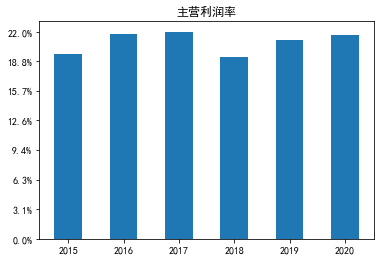

In [34]:
analysis.show_plot('t14')

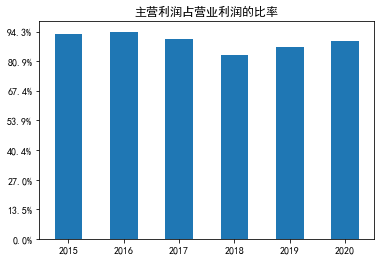

In [35]:
analysis.show_plot('t14', image_index=1)

### 看净利润，了解公司的经营成果及含金量

In [36]:
t15 = analysis.init_table('t15')
t15['净利润现金比率'] = t15['经营活动产生的现金流量净额(元)'] / t15['五、净利润(元)']

analysis.format_show_table('t15')

,2015,2016,2017,2018,2019,2020
经营活动产生的现金流量净额(元),"1,123,649,800","1,545,448,500","1,272,482,600","1,508,960,300","1,555,220,900","1,537,300,000"
五、净利润(元),"827,950,300","1,206,814,400","1,461,194,100","1,483,847,900","1,614,245,400","1,687,357,900"
净利润现金比率,135.71%,128.06%,87.09%,101.69%,96.34%,91.11%


In [37]:
print(f"连续 5 年的平均净利润现金含量：{t15['净利润现金比率'].mean():.2%}")

连续 5 年的平均净利润现金含量：106.67%


### 归母净利润

In [38]:
t16 = analysis.init_table('t16')
t16['ROE 净资产收益率'] = t16['归属于母公司所有者的净利润(元)'] / t16['归属于母公司所有者权益合计(元)']
t16['归属于母公司所有者的净利润增长率'] = t16['归属于母公司所有者的净利润(元)'].pct_change()

analysis.format_show_table('t16')

,2015,2016,2017,2018,2019,2020
归属于母公司所有者的净利润(元),"830,491,200","1,206,833,900","1,461,213,500","1,473,579,700","1,589,814,800","1,660,750,000"
归属于母公司所有者权益合计(元),"3,169,577,200","4,128,555,100","5,260,800,800","6,045,384,400","6,864,388,900","8,050,626,800"
ROE 净资产收益率,26.20%,29.23%,27.78%,24.38%,23.16%,20.63%
归属于母公司所有者的净利润增长率,nan%,45.32%,21.08%,0.85%,7.89%,4.46%


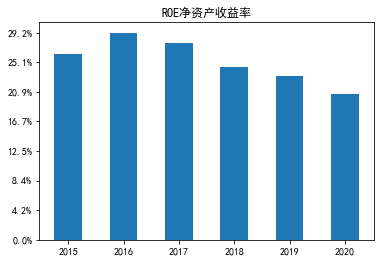

In [39]:
analysis.show_plot('t16')

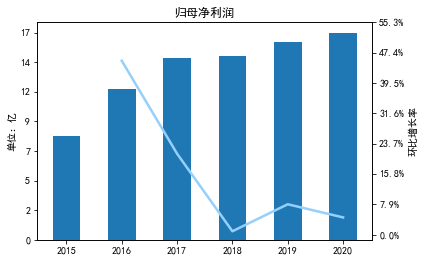

In [40]:
analysis.show_plot('t16', image_index=1)

### 构建三产支付的现金

In [41]:
t17 = analysis.init_table('t17')

t17['购建支付的现金与经营活动产生的现金流量净额的比率'] = \
t17['购建固定资产、无形资产和其他长期资产支付的现金(元)'] / t17['经营活动产生的现金流量净额(元)']

analysis.format_show_table('t17')

,2015,2016,2017,2018,2019,2020
购建固定资产、无形资产和其他长期资产支付的现金(元),"278,075,100","199,329,700","146,347,300","180,703,200","272,163,300","282,289,900"
经营活动产生的现金流量净额(元),"1,123,649,800","1,545,448,500","1,272,482,600","1,508,960,300","1,555,220,900","1,537,300,000"
购建支付的现金与经营活动产生的现金流量净额的比率,24.75%,12.90%,11.50%,11.98%,17.50%,18.36%


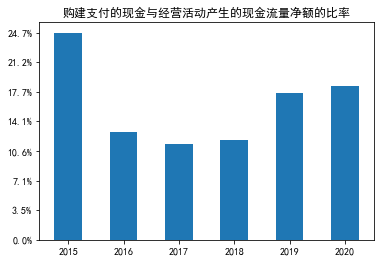

In [42]:
analysis.show_plot('t17')

### 分红

In [43]:
t18 = analysis.init_table('t18')

t18['分配股利、利润或偿付利息支付的现金占经营活动产生的现金流量净额的比率'] = \
t18['分配股利、利润或偿付利息支付的现金(元)'] / t18['经营活动产生的现金流量净额(元)']

analysis.format_show_table('t18')

,2015,2016,2017,2018,2019,2020
分配股利、利润或偿付利息支付的现金(元),"162,025,000","292,022,700","365,012,600","711,774,600","759,219,200","474,512,000"
经营活动产生的现金流量净额(元),"1,123,649,800","1,545,448,500","1,272,482,600","1,508,960,300","1,555,220,900","1,537,300,000"
分配股利、利润或偿付利息支付的现金占经营活动产生的现金流量净额的比率,14.42%,18.90%,28.69%,47.17%,48.82%,30.87%


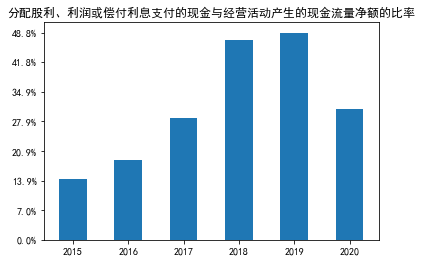

In [44]:
analysis.show_plot('t18')

### 公司类型

In [45]:
t19 = analysis.init_table('t19')
t19_tmp = t19.copy()

t19_tmp['经营活动产生的现金流量净额(元)'][t19['经营活动产生的现金流量净额(元)']>0] = "正"
t19_tmp['经营活动产生的现金流量净额(元)'][t19['经营活动产生的现金流量净额(元)']<0] = "负"

t19_tmp['投资活动产生的现金流量净额(元)'][t19['投资活动产生的现金流量净额(元)']>0] = "正"
t19_tmp['投资活动产生的现金流量净额(元)'][t19['投资活动产生的现金流量净额(元)']<0] = "负"

t19_tmp['筹资活动产生的现金流量净额(元)'][t19['筹资活动产生的现金流量净额(元)']>0] = "正"
t19_tmp['筹资活动产生的现金流量净额(元)'][t19['筹资活动产生的现金流量净额(元)']<0] = "负"

t19_tmp['三大活动现金流量净额类型'] = \
t19_tmp['经营活动产生的现金流量净额(元)'] + t19_tmp['投资活动产生的现金流量净额(元)'] + t19_tmp['筹资活动产生的现金流量净额(元)']

t19['三大活动现金流量净额类型'] = t19_tmp['三大活动现金流量净额类型']
analysis.format_show_table('t19', ignore=['三大活动现金流量净额类型'])

,2015,2016,2017,2018,2019,2020
经营活动产生的现金流量净额(元),"1,123,649,800","1,545,448,500","1,272,482,600","1,508,960,300","1,555,220,900","1,537,300,000"
投资活动产生的现金流量净额(元),"-305,773,451","-198,322,518","-1,782,469,713","-1,183,503,791","1,055,539,452","-1,217,671,577"
筹资活动产生的现金流量净额(元),"-100,627,000","-226,383,520","-365,205,405","-711,857,630","-759,219,240","-461,785,848"
三大活动现金流量净额类型,正负负,正负负,正负负,正负负,正正负,正负负


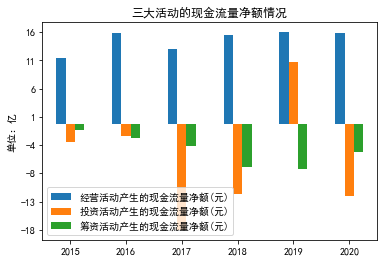

In [46]:
analysis.show_plot('t19')

### 输出分析报告

In [47]:
ReportDocument(analysis).save()